In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
import Tr_centrality_measure
import Graph_Entropy_measure
import Selection_Algorithm
import Constraint_Coefficient

In [3]:
def graph():    
    import graph
    Graph = graph.H
    return Graph
G = graph()

E:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


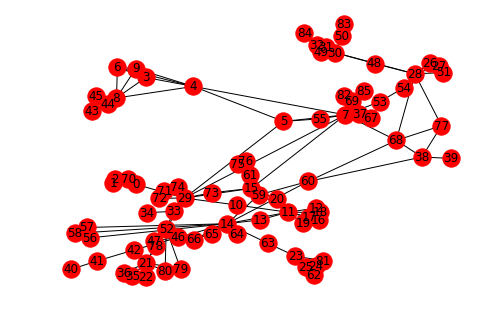

In [4]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
nx.draw(G, with_labels = True)
plt.show()
#plt.savefig("out.png")

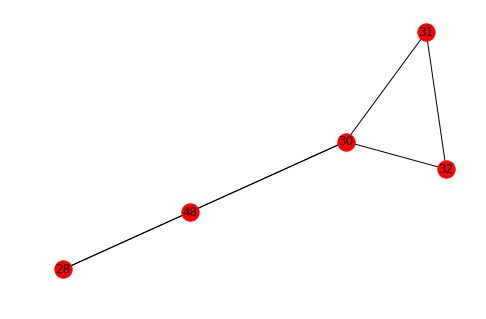

In [9]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
nx.draw(Selection_Algorithm.subgraph_of(30), with_labels = True)
plt.show()
#plt.savefig("out.png")